# Linear Regression

In [1]:
import requests
import bs4
import urllib
import webbrowser
import re
import csv
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import nltk
from matplotlib import pyplot as plt
import datetime
from datetime import date
import time
import seaborn as sns
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from pycorenlp import StanfordCoreNLP
nltk.download('vader_lexicon')
sia=SIA()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jains\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_csv("Google.csv",index_col = 0)
datetime.datetime.strptime(df['Date'][0],'%b %d, %Y')
df.loc[:, 'Date'] = pd.to_datetime(df['Date'],format='%b %d, %Y')
df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]
df.sort_values(by='date', inplace=True, ascending=True)
df['low'] = df['low'].astype(float)
df['open'] = df['open'].astype(float)
df['high'] = df['high'].astype(float)
df['adj_close**'] = df['adj_close**'].astype(float)
df.drop(['close*'],axis = 1,inplace = True)
df.drop(['volume'],axis = 1, inplace = True)

In [3]:
df

date     open     high      low  adj_close**
0   2019-05-31  1105.64  1113.40  1103.35      1106.50
1   2019-06-03  1066.93  1067.00  1027.03      1038.74
2   2019-06-04  1044.49  1058.44  1036.03      1054.49
3   2019-06-05  1055.00  1056.81  1033.00      1044.64
4   2019-06-06  1046.21  1050.00  1035.51      1047.76
..         ...      ...      ...      ...          ...
163 2020-01-24   995.15  1009.90   991.55       992.49
164 2020-01-27   985.00  1005.00   985.00       986.57
165 2020-01-28   985.00  1005.95   981.00       983.28
166 2020-01-29   986.00   999.80   985.00       983.63
167 2020-01-30   993.70   993.70   976.90       976.97

[168 rows x 5 columns]

In [4]:
df_linear = df

In [5]:
test_size = 0.2
num_test_linear = int(len(df_linear) * test_size)
num_train_linear = len(df_linear) - num_test_linear

In [6]:
scaler = StandardScaler()

In [7]:
df_linear = scaler.fit_transform(np.array(df_linear[['open','high','low','adj_close**']]))

In [8]:
x_linear_train = df_linear[:num_train_linear,:]

In [9]:
x_linear_test = df_linear[num_train_linear:-1,:]

In [10]:
y_linear_test = df_linear[num_train_linear+1:, 1]

In [11]:
y_linear = df_linear[1:num_train_linear+1,1]

In [12]:
ds = pd.DataFrame({'date': df[num_train_linear+1:]['date'], 'high':  df_linear[num_train_linear+1:,1]})

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [14]:
regressor.fit(x_linear_train, y_linear)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_linear_pred = regressor.predict(x_linear_test)

In [16]:
est_linear_df = pd.DataFrame({'est': y_linear_pred.reshape(-1), 
                       'date': df[num_train_linear+1:]['date']})

Text(0, 0.5, 'USD')

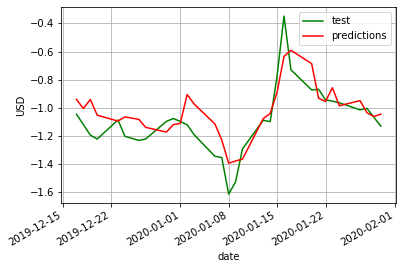

In [17]:
ax = ds.plot(x='date', y='high', style='g-', grid=True)
ax = est_linear_df.plot(x='date', y='est', style='r-', grid=True, ax=ax)
ax.legend(['test', 'predictions'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

In [18]:
mean_squared_error(y_linear_test,y_linear_pred)

0.01848227964597198